In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import cm
from skimage import color
from skimage import io
import numba
from numba import jit
import time

Boundaries

In [10]:
edge = np.linspace(-1, 1, 300)
upper_y = np.cos(np.pi*edge/2)
lower_y = edge**4
upper_x = 1/(np.e**(-1) - np.e) * (np.exp(edge) - np.e)
lower_x = 0.5*(edge**2 - edge)

Meshgrid

In [11]:
xv, yv = np.meshgrid(edge, edge)

In [32]:
@numba.jit("f8[:,:], i8", nopython=True, nogil=True)
def compute_potential(potential, n_iter):
    length = len(potential[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length-1):
                potential[i][j] = (1/4)*(potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    return potential

In [33]:
potential = np.zeros((300,300))
potential[0,:] = lower_y
potential[-1,:] = upper_y
potential[:,0] = lower_x
potential[:,-1] = upper_x

In [34]:
t0 = time.time()
potential = compute_potential(potential, n_iter=10000)
t1 = time.time()
print(t1-t0)

0.7323348522186279


In [35]:
potential

array([[ 1.        ,  0.97351141,  0.94755256, ...,  0.94755256,
         0.97351141,  1.        ],
       [ 0.98998893,  0.96497969,  0.95124775, ...,  0.43364054,
         0.26669527,  0.99894955],
       [ 0.98002259,  0.94517068,  0.93251944, ...,  0.4927463 ,
         0.45085432,  0.99789205],
       ...,
       [-0.00659948,  0.51906008,  0.47130673, ...,  0.03524096,
         0.0272347 ,  0.01536878],
       [-0.00332211,  0.71423895,  0.5405363 , ...,  0.02618623,
         0.01790946,  0.00771009],
       [ 0.        ,  0.01050681,  0.02101245, ...,  0.02101245,
         0.01050681, -0.        ]])

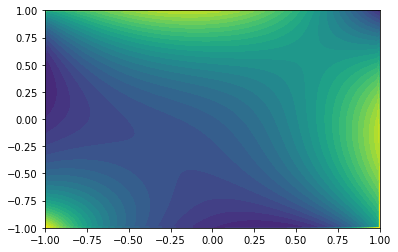

In [36]:
plt.contourf(xv, yv, potential, 30)

With a Block of fixed potential

In [24]:
def potential_block(x, y):
    return np.select([(x>0.5)*(x<0.7)*(y>0.5)*(y<0.7), 
                     (x<=0.5)+(x>=0.7)+(y<=0.5)+(y>0.7)],
                    [1,0])

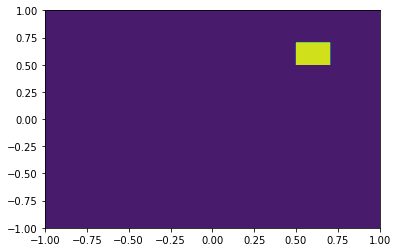

In [25]:
plt.contourf(xv,yv, potential_block(xv, yv))

In [26]:
fixed = potential_block(xv, yv)
fixed_bool = fixed!=0

In [30]:
@numba.jit("f8[:,:](f8[:,:], b1[:,:], i8)", nopython=True, nogil=True)
def compute_potential(potential, fixed_bool, n_iter):
    length = len(potential[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length-1):
                if not(fixed_bool[j][i]):
                    potential[i][j] = (1/4)*(potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    return potential

In [31]:
potential = np.zeros((300,300))
potential[0,:] = lower_y
potential[-1,:] = upper_y
potential[:,0] = lower_x
potential[:,-1] = upper_x
potential[fixed_bool] = fixed[fixed_bool]
potential = compute_potential(potential, fixed_bool, n_iter=10000)

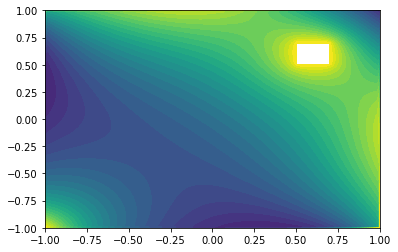

In [34]:
plt.contourf(xv, yv, potential, 30)
plt.savefig("square_potential")